# PCA ANALYSIS

In [1]:
import numpy as np
import scipy.io as sci
import matplotlib.pyplot as plt


In [2]:
wheel_data = sci.loadmat(f'./Contact_point/Trial0001.mat')
cp_data = sci.loadmat(f'./Contact_point/Trial0001_ContactPoint.mat')
keys = list(wheel_data.keys())
for key in keys:
    print(key)
rot_data = wheel_data[keys[-1]]
# rot_data
cp = cp_data['contact_points']

__header__
__version__
__globals__
Trial0001


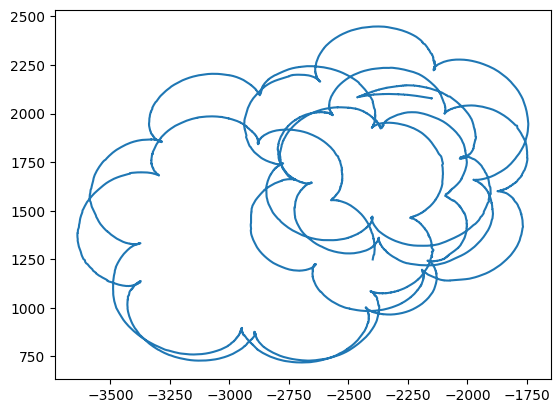

In [3]:
plt.plot(cp[0], cp[1])

In [4]:
rot_data[0][0][-1][0][0].dtype

dtype([('Bodies', 'O'), ('Name', 'O'), ('Filter', 'O'), ('CoordinateSystem', 'O'), ('Positions', 'O'), ('Rotations', 'O'), ('RPYs', 'O'), ('Residual', 'O')])

In [5]:
rotations = rot_data[0][0][-1][0][0]['Rotations'][0]
print(np.shape(rotations))

(9, 5073)


In [6]:
def rotation_matrix_to_euler_angles(t):
    R = np.array([
    [rotations[0, t], rotations[1, t], rotations[2, t]],
    [rotations[3, t], rotations[4, t], rotations[5, t]],
    [rotations[6, t], rotations[7, t], rotations[8, t]]
])
    sy = np.sqrt(R[0, 0] ** 2 + R[1, 0] ** 2)
    singular = sy < 1e-6

    if not singular:
        x = np.arctan2(R[2, 1], R[2, 2])  # roll (sagittal plane)
        y = np.arctan2(-R[2, 0], sy)      # pitch (frontal plane)
        z = np.arctan2(R[1, 0], R[0, 0])  # yaw (transverse plane)
    else:
        x = np.arctan2(-R[1, 2], R[1, 1])
        y = np.arctan2(-R[2, 0], sy)
        z = 0

    return np.degrees(x), np.degrees(y), np.degrees(z)  # Return in degrees

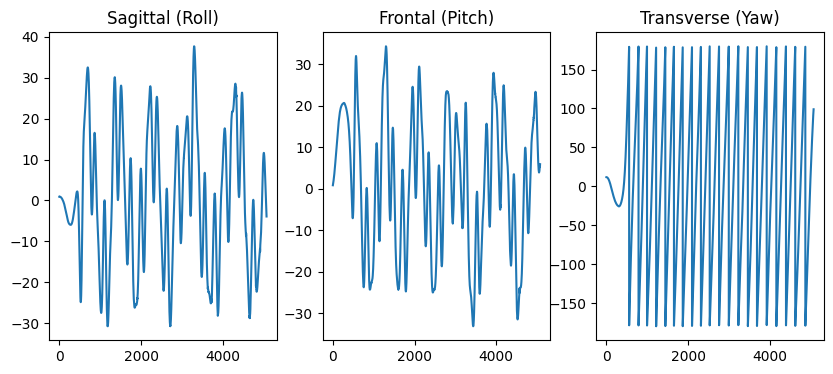

In [13]:


# Example usage:
final_time = np.shape(rotations)[1]
t_range = range(0,final_time)

final_angles = np.empty((final_time, 3))
for t in t_range:
    angles = rotation_matrix_to_euler_angles(t)
    final_angles[t] = angles
# print("Sagittal (Roll):", angles[0])
# print("Frontal (Pitch):", angles[1])
# print("Transverse (Yaw):", angles[2])
fig, ax = plt.subplots(1, 3, figsize = (10,4)) 
for i in range(3):
    ax[i].plot(t_range, final_angles.T[i])
    ax[i].set_title(['Sagittal (Roll)','Frontal (Pitch)','Transverse (Yaw)'][i])

In [79]:
# For one plane of rotation.

trial_number = 1
mat_data = sci.loadmat(f'./data/Trial{trial_number} Kinematics.mat')
angle = 0 #transverse plane
# Printing the keys in our .mat file. 
# print(mat_data.keys())  
keys = list(mat_data.keys())


time_passed = len(mat_data[keys[-1]][0][0])
time = range(time_passed)
data_matrix = []
for i in range(6,len(keys)):
    if keys[i] != 'Center_of_Mass' and keys[i] != 'Pelvis_Angles':
        print(keys[i])
        data = mat_data[keys[i]][0][0]
        # print(data)
        # print(len(data))
        # print("Shape", data.shape)
        data_matrix.append(data.T[angle])



Left_Ankle_Angles
Left_Elbow_Angles
Left_Hip_Angles
Left_Knee_Angles
Left_Shoulder_Angles
Left_Wrist_Angles
Right_Ankle_Angles
Right_Elbow_Angles
Right_Hip_Angles
Right_Knee_Angles
Right_Shoulder_Angles
Right_Wrist_Angles
Trunk_Angles


In [80]:
data_mat = np.array(data_matrix).T


Text(0.5, 1.0, 'explaned variance')

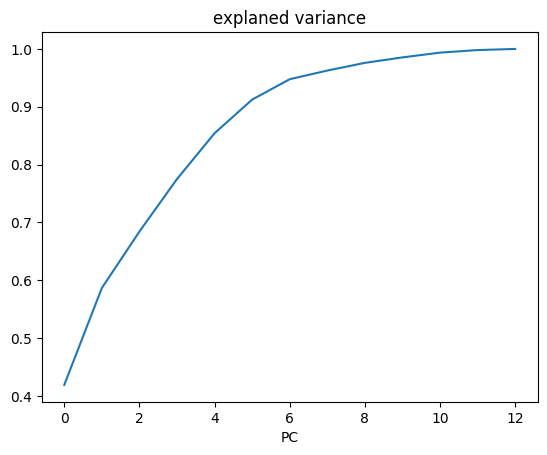

In [81]:
### Step 1: Standardize the Data along the Features
standardized_data = (data_mat - data_mat.mean(axis = 0)) / data_mat.std(axis = 0)


### Step 2: Calculate the Covariance Matrix
# use `ddof = 1` if using sample data (default assumption) and use `ddof = 0` if using population data
covariance_matrix = np.cov(standardized_data, ddof = 1, rowvar = False)


### Step 3: Eigendecomposition on the Covariance Matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)


### Step 4: Sort the Principal Components
# np.argsort can only provide lowest to highest; use [::-1] to reverse the list
order_of_importance = np.argsort(eigenvalues)[::-1] 

# utilize the sort order to sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance] # sort the columns


### Step 5: Calculate the Explained Variance
# use sorted_eigenvalues to ensure the explained variances correspond to the eigenvectors
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)


### Step 6: Reduce the Data via the Principal Components
k = 2 # select the number of principal components
reduced_data = np.matmul(standardized_data, sorted_eigenvectors[:,:k]) # transform the original data


### Step 7: Determine the Explained Variance
total_explained_variance = sum(explained_variance[:k])

##labels
label = np.delete(keys[6:], 12)
label = np.delete(label, -1)

### Potential Next Steps: Iterate on the Number of Principal Components
plt.plot(np.cumsum(explained_variance))
plt.xlabel("PC")
plt.title("explaned variance")

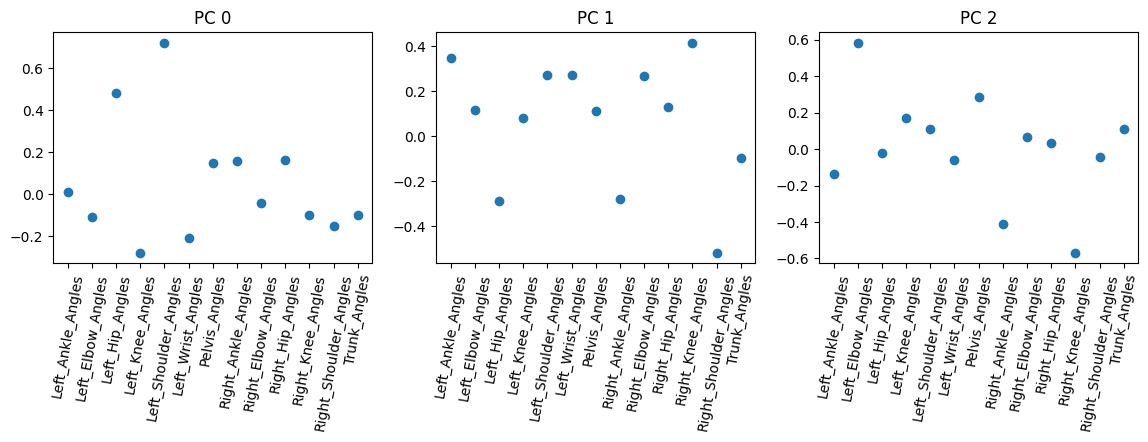

In [82]:
fig, ax = plt.subplots(1,3, figsize = (14,3))
# print(len(label), len(sorted_eigenvectors[0]))
for i in range(3):
    ax[i].scatter(range(len(label)),sorted_eigenvectors[i])
    ax[i].set_xticks(ticks=range(len(label)), labels=label, rotation = 80)
    ax[i].set_title(f'PC {i}')


Text(0.5, 0, 'PC')

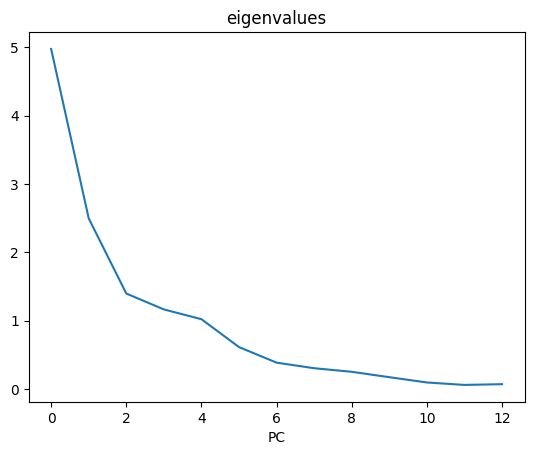

In [77]:
plt.plot(range(len(label)), eigenvalues)
plt.title("eigenvalues")
plt.xlabel("PC")
